<a href="https://colab.research.google.com/github/Clement-nshimiyimana/AMMI-first-week/blob/Colab/Clement_Nshimiyimana_Assignment_4_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1. Get dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dt = pd.read_excel('/content/drive/MyDrive/CCPP/CCPP/Folds5x2_pp.xlsx')

In [ ]:
dt.shape

(9568, 5)

In [ ]:
dt.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
dt.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
cor = dt.corr()
cor

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


The highest predictors of energy output(PE) are Temperature(AT) and Exhaust vaccum(V) as they have a high correlation with the target variable(PE). Even if the correlation is negative but both temperature and exhaust vaccum are highly effective to the change of output energy(PE).

<AxesSubplot:>

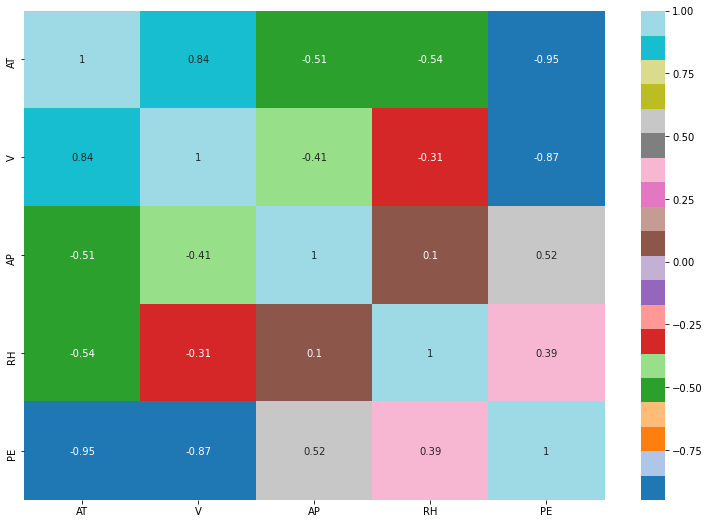

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(cor, cmap='tab20', annot=True)

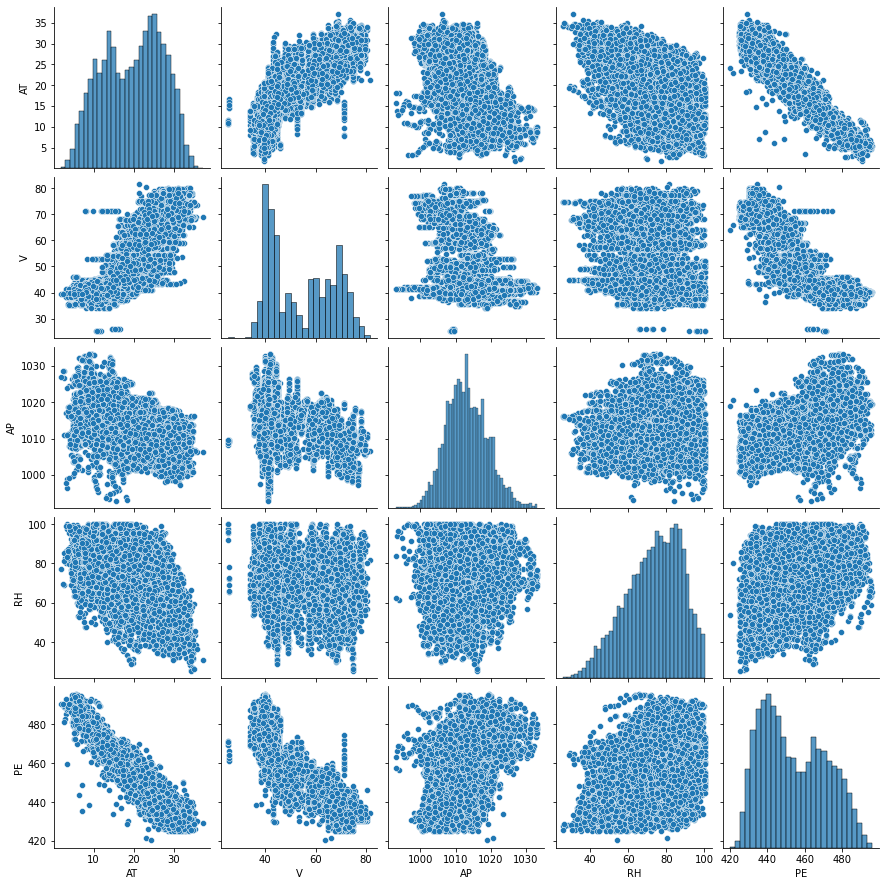

In [ ]:
sns.pairplot(dt)

Text(0.5, 1.0, 'Energy output')

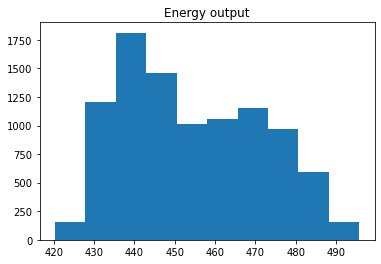

In [ ]:
plt.hist(dt['PE'])
plt.title('Energy output')

In [ ]:
#### Normalization
dt2 = (dt-dt.min())/(dt.max()-dt.min())

In [ ]:
dt2.head()

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464


In [ ]:
######Data shuffling
dt2 = dt2.sample(frac=1).reset_index(drop=True)
dt2.head()

,AT,V,AP,RH,PE
0,0.752975,0.714413,0.535264,0.548525,0.245298
1,0.675921,0.792171,0.369958,0.774263,0.279338
2,0.276771,0.272242,0.596634,0.959383,0.611391
3,0.564873,0.621174,0.634991,0.834450,0.316954
4,0.205949,0.192527,0.676813,0.573861,0.754967


In [ ]:
X=dt2[['AT', 'V', 'AP','RH']]
Y= dt2['PE']

In [ ]:
X.shape

(9568, 4)

In [ ]:
###############data splitting############
def read_data(path):
    """
    path=''/content/drive/MyDrive/CCPP/CCPP/Folds5x2_pp.xlsx''
    """
    data = pd.read_excel(path)

    return data

data = read_data('/content/drive/MyDrive/CCPP/CCPP/Folds5x2_pp.xlsx')

def split_train_valid(data,valid_ratio):
    shuffl = np.random.permutation(data.shape[0])
    valid_size = int(len(data)*valid_ratio)
    valid_id =shuffl[:valid_size]
    train_id = shuffl[valid_size:]
    train_data = data.iloc[train_id]
    valid_data = data.iloc[valid_id]
    x_train = train_data.iloc[:,0:-1]
    x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())
    x_valid = valid_data.iloc[:,0:-1]
    x_valid = (x_valid-x_valid.min())/(x_valid.max()-x_valid.min())
    y_train = train_data.iloc[:,-1]
    y_valid = valid_data.iloc[:,-1]
    # convert to array
    x_train = x_train.values
    x_train = np.c_[x_train,np.ones((len(x_train),1))]
    x_valid = x_valid.values
    x_valid = np.c_[x_valid,np.ones((len(x_valid),1))]
    y_train = y_train.values.reshape(-1,1)
    y_valid = y_valid.values.reshape(-1,1)
    return x_train, y_train,x_valid, y_valid

x_train, y_train,x_valid, y_valid=split_train_valid(data,valid_ratio=0.2)
print(len(x_train),len(y_train), len(x_valid),len(y_valid))

7655 7655 1913 1913


Step2. Model Implementation

Batch gradient descent

In [ ]:

class LinearReg_BGD:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    def fit(self, x, y):

        cost =[]
        self.theta = np.random.randn(x.shape[1]).reshape((-1,1))
        y = y.reshape(-1,1)
        for i in range(self.iteration):

            prev = self.theta
            loss = self.mse(y, x@prev)
            self.theta = self.theta - self.LR*(2/len(x))*(x.T@(x@self.theta) - x.T@y)
            cost.append(loss)
            if np.linalg.norm(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost   
    def predict(self,x):
        y_pred = x @ self.theta
        return y_pred
    def mse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
model= LinearReg_BGD(50000, 0.01, 0.00001)
theta, cost = model.fit(x_train, y_train)

Text(0.5, 1.0, 'Cost')

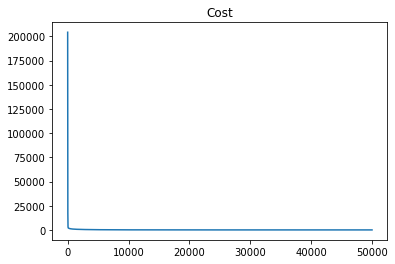

In [ ]:
plt.plot(cost)
plt.title('Cost')

In [ ]:
predict_y = model.predict(x_valid)
predict_y.shape, y_valid.shape

((1913, 1), (1913, 1))

In [ ]:
mse = model.mse(y_valid, predict_y)
mse

26.188276722892923

Stochastic Gradient descent

In [ ]:

class LinearReg_SGD:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    
    def fit(self, x, y):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1])                          
        y = y.reshape(-1,1)
        for i in range(self.iteration):

#             if i%100 == 0: print(i)
            index = np.random.randint(n)
            xi = x[index]
            yi = y[index]          
            prev = self.theta
            loss = self.rmse(yi, xi@prev)
            self.theta = self.theta - self.LR*(xi*(xi@self.theta - yi))
            cost.append(loss)
            if np.sum(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost   
    
    def predict(self,x):
        y_pred = x @ theta
        return y_pred
    
    def rmse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
model= LinearReg_SGD(50000, 0.01, 0.00001)
theta, cost = model.fit(x_train, y_train)

In [ ]:
theta

array([-40.56614475, -28.74773333,  16.23181136,   0.99512919,
       480.89392593])

Text(0.5, 1.0, 'Cost')

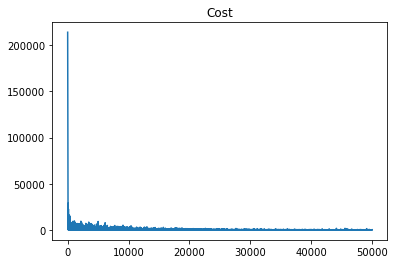

In [ ]:
plt.plot(cost)
plt.title('Cost')

In [ ]:
predict_y = model.predict(x_valid)
predict_y.shape, y_valid.shape

((1913,), (1913, 1))

In [ ]:
mse = model.rmse(y_valid, predict_y)
mse

31.64231861968921

MiniBatch Gradient descent

In [ ]:

class LinearReg_MBGD:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    
    def fit(self, x, y, batch_size=128):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):
                xi = x[index*batch_size:index*batch_size+batch_size]
                yi = y[index*batch_size:index*batch_size+batch_size]
  
                prev = self.theta
                loss = self.mse(yi, xi @ prev)
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi))
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost   
    
    def predict(self,x):
        y_pred = x @ self.theta
        
        return y_pred
    
    def mse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
model= LinearReg_MBGD(500, 0.001, 0.0001)
theta, cost = model.fit(x_train, y_train)

In [ ]:
theta

array([[-68.71042955],
       [-13.28449099],
       [  2.42295388],
       [-11.75305541],
       [501.85866667]])

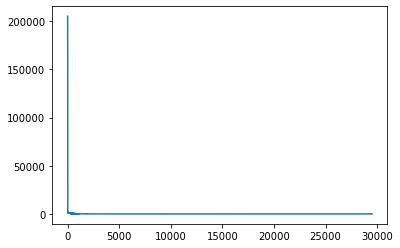

In [ ]:
plt.plot(cost)

In [ ]:
predict_y = model.predict(x_valid)
predict_y

array([[468.54085633],
       [427.48713947],
       [478.5960097 ],
       ...,
       [467.25119238],
       [475.06751362],
       [432.39710961]])

In [ ]:
mse = model.mse(y_valid, predict_y)
mse

25.38939642995784

In [ ]:
predict_y.shape

(1913, 1)

In [ ]:
x=(y_valid.reshape(-1,1) - predict_y.reshape(-1,1))**2

In [ ]:
sum(x) /1913

array([881.01415476])

Step3. Fitting the model

BGD and regularization

In [ ]:

class LinearReg_BGD_reg:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    def fit_l1(self, x, y,alpha=0.01):
        cost =[]
        self.theta = np.random.randn(x.shape[1]).reshape((-1,1))
        y = y.reshape(-1,1)
        for i in range(self.iteration):

            prev = self.theta
            loss = self.mse(y, x@prev)+np.linalg.norm(self.theta)
            self.theta = self.theta - self.LR*(2/len(x))*((x.T@(x@self.theta) - y)+alpha*self.theta/np.abs(self.theta)))
            cost.append(loss)
            if np.linalg.norm(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost
    
    def fit_l2(self, x, y,alpha=0.01):

        cost =[]
        self.theta = np.random.randn(x.shape[1]).reshape((-1,1))
        y = y.reshape(-1,1)
        for i in range(self.iteration):

            prev = self.theta
            loss = self.mse(y, x@prev)+alpha*np.linalg.norm(self.theta)**2
            self.theta = self.theta - self.LR*(2/len(x))*((x.T@(x@self.theta) - y)+2*alpha*self.theta)
            cost.append(loss)
            if np.linalg.norm(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost  
    def fit_l1_l2(self, x, y,alpha=0.01):

        cost =[]
        self.theta = np.random.randn(x.shape[1]).reshape((-1,1))
        y = y.reshape(-1,1)
        r = alpha+2*((1-alpha)*self.theta)
        k = alpha*np.linalg.norm(self.theta)+(1-alpha)*np.linalg.norm(self.theta)**2        
        for i in range(self.iteration):
            prev = self.theta
            loss = self.mse(y, x@prev)+k
            self.theta = self.theta - self.LR*(2/len(x))*((x.T@(x@self.theta) - y)+r)
            cost.append(loss)
            if np.linalg.norm(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost  
    
    def predict(self,x):
        y_pred = x @ self.theta 
        return y_pred
    def mse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
modelb = LinearReg_BGD_reg(10000,0.0001, 0.00001)

In [ ]:
theta1,cost1=modelb.fit_l1(x_train, y_train)

In [ ]:
theta1

array([[ 92.31538467],
       [ 91.49664126],
       [109.44749197],
       [134.40500456],
       [210.89904111]])

In [ ]:
theta2,cost2=modelb.fit_l2(x_train, y_train)

In [ ]:
theta2

array([[ 89.39857252],
       [ 95.25861813],
       [107.77962357],
       [135.37367093],
       [210.62878845]])

In [ ]:
theta12, cost12=modelb.fit_l1_l2(x_train, y_train)

Text(0.5, 1.0, 'BGD cost with l2 regularizer')

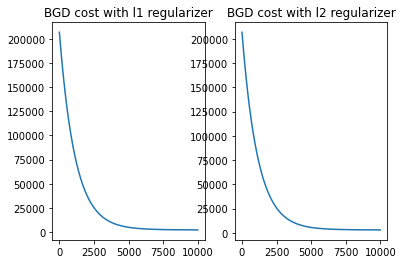

In [ ]:
plt.subplot(1,2,1)
plt.plot(cost1)
plt.title('BGD cost with l1 regularizer')
plt.subplot(1,2,2)
plt.plot(cost2)
plt.title('BGD cost with l2 regularizer')


Text(0.5, 1.0, 'BGD cost with l1+l2 regularizer')

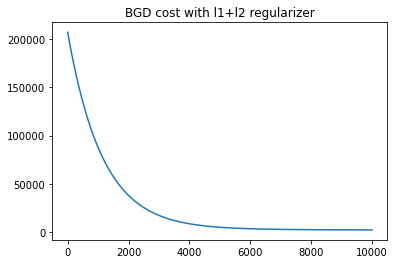

In [ ]:

plt.plot(cost12)
plt.title('BGD cost with l1+l2 regularizer')

In [ ]:
y_pred =model.predict(x_valid)
y_pred.shape

(1913, 1)

In [ ]:
mse = model.mse(y_valid, y_pred)
mse

26.188276722892923

SGD and regularization

In [ ]:

class LinearReg_SGD_reg:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    
    def fit_l1(self, x, y,alpha=0.01):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1])                     
        y = y.reshape(-1,1)
        
        for i in range(self.iteration):
#             if i%100 == 0: print(i)

            index = np.random.randint(n)
            xi = x[index]
            yi = y[index]

            prev = self.theta
            loss = self.rmse(yi, xi@prev)+alpha*np.linalg.norm(self.theta)
            self.theta = self.theta - self.LR*(xi*(xi@self.theta - yi)+alpha*self.theta/np.abs(self.theta)))
            cost.append(loss)
            if np.sum(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost
    
    def fit_l2(self, x, y, alpha=0.01):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1])                          
        y = y.reshape(-1,1)
        for i in range(self.iteration):
#             if i%100 == 0: print(i)

            index = np.random.randint(n)
            xi = x[index]
            yi = y[index]

            prev = self.theta
            loss = self.rmse(yi, xi@prev)+alpha*(np.linalg.norm(self.theta)**2)
            self.theta = self.theta - self.LR*(xi*(xi@self.theta - yi)+2*alpha*np.linalg.norm(self.theta))
            cost.append(loss)
            if np.sum(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost

    def fit_l1_l2(self, x, y, alpha=0.01):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1])
        print(self.theta)                            
        y = y.reshape(-1,1)
        r = alpha*np.linalg.norm(self.theta)+(1-alpha)*np.linalg.norm(self.theta)**2
        k = alpha+2*(1-alpha)*np.linalg.norm(self.theta)
        for i in range(self.iteration):
#             if i%100 == 0: print(i)

            index = np.random.randint(n)
            xi = x[index]
            yi = y[index]

            prev = self.theta
            loss = self.rmse(yi, xi@prev)+r
            self.theta = self.theta - self.LR*(xi*(xi@self.theta - yi)+k)
            cost.append(loss)
            if np.sum(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost 
    
    def predict(self,x):
        y_pred = x @ self.theta
        return y_pred
    
    def rmse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
models = LinearReg_SGD_reg(200, 0.01, 0.00001)

In [ ]:
thetas1, costs1 = models.fit_l1(x_train, y_train)


In [ ]:
thetas1

array([ 98.09805872, 100.62437468, 108.51523539, 131.09962799,
       207.55508208])

Text(0.5, 1.0, 'Cost: SGD vs l1 regularizer')

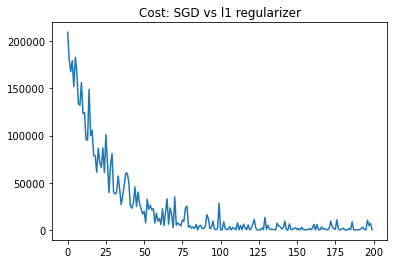

In [ ]:
plt.plot(costs1)
plt.title('Cost: SGD vs l1 regularizer')

In [ ]:
thetas2, costs2 = models.fit_l2(x_train, y_train)

In [ ]:
thetas2

array([ 84.95845513,  86.25534472, 110.36524836, 133.96418733,
       212.6794168 ])

Text(0.5, 1.0, 'Cost: SGD vs l2 regularizer')

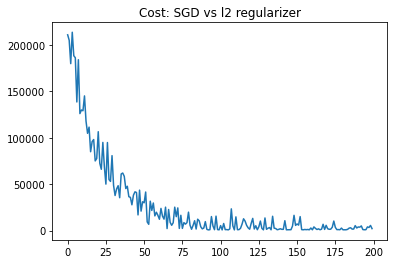

In [ ]:
plt.plot(costs2)
plt.title('Cost: SGD vs l2 regularizer')

In [ ]:
thetas12, costs12 = models.fit_l1_l2(x_train, y_train)

[0.52694342 0.45803429 0.46502466 0.4684535  0.6603062 ]


Text(0.5, 1.0, 'Cost: SGD vs l1 and l2 regularizers')

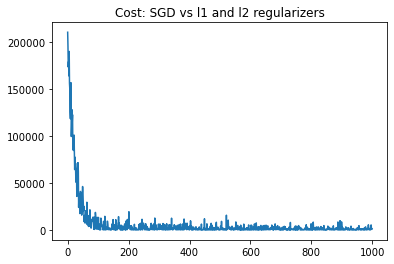

In [ ]:
plt.plot(costs12)
plt.title('Cost: SGD vs l1 and l2 regularizers')

Minibatch GD and regularizers(l1, l2)

In [ ]:

class LinearReg_MBGD:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    
    def fit_l1(self, x, y, batch_size=128,alpha=0.01):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):

                xi = x[index*batch_size:index*batch_size+batch_size]
                yi = y[index*batch_size:index*batch_size+batch_size]        
 
                prev = self.theta
                loss = self.rmse(yi, xi @ prev)+alpha*np.linalg.norm(self.theta)
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi)+alpha*self.theta/np.abs(self.theta)))
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost 
    
    def fit_l2(self, x, y, batch_size=80,alpha=0.01):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):

                xi = x[index].reshape(1,x.shape[1])
                yi = y[index]
  
                prev = self.theta
                loss = self.rmse(yi, xi @ prev)+alpha*(np.linalg.norm(self.theta)**2)
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi)+2*alpha*np.linalg.norm(self.theta))
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost

    def fit_l1_l2(self, x, y, batch_size=80,alpha=0.01):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        r = alpha*np.linalg.norm(self.theta)+(1-alpha)*np.linalg.norm(self.theta)**2
        k = alpha+2*(1-alpha)*np.linalg.norm(self.theta)        
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):

                xi = x[index].reshape(1,x.shape[1])
                yi = y[index]
 
                prev = self.theta
                loss = self.rmse(yi, xi @ prev)+r
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi)+k)
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost 
    
    def predict(self,x):
        y_pred = x @ self.theta
        return y_pred
    
    def rmse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
modelm = LinearReg_MBGD(3, 0.01, 0.0001)

In [ ]:
thetam1,costm1= modelm.fit_l1(x_train, y_train)

In [ ]:
thetam1

array([[2.50581092e+47],
       [2.76297847e+47],
       [2.48301943e+47],
       [3.26597269e+47],
       [5.01682567e+47]])

Text(0.5, 1.0, 'Cost: MBGD and l1 regularizer')

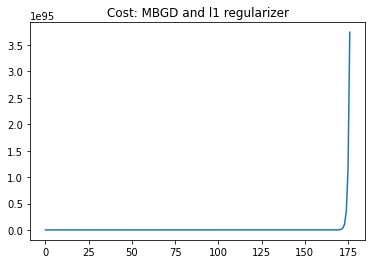

In [ ]:
plt.plot(costm1)
plt.title('Cost: MBGD and l1 regularizer')

In [ ]:
thetam2,costm2= modelm.fit_l2(x_train, y_train)
thetam2

array([[ 78.83926231],
       [ 77.06744223],
       [107.72694755],
       [135.82253876],
       [218.74922609]])

Text(0.5, 1.0, 'Cost: MBGD and l2 regularizer')

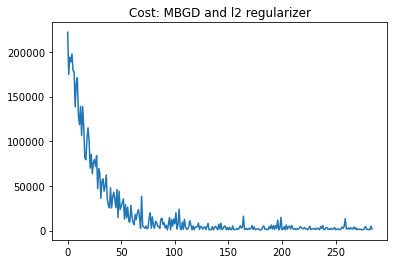

In [ ]:
plt.plot(costm2)
plt.title('Cost: MBGD and l2 regularizer')

In [ ]:
thetam12,costm12= modelm.fit_l1_l2(x_train, y_train)
thetam12

array([[ 81.51044065],
       [ 79.41164546],
       [110.51057817],
       [137.14214127],
       [217.80991643]])

Text(0.5, 1.0, 'Cost: MBGD and l1,l2 regularizers')

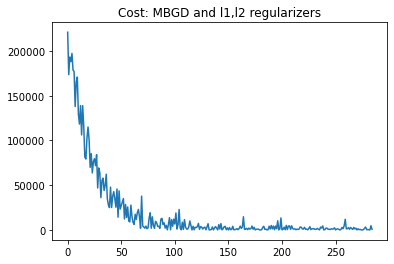

In [ ]:
plt.plot(costm12)
plt.title('Cost: MBGD and l1,l2 regularizers') 

Model where lambas are [-10,10]

In [ ]:

class LinearReg_change:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    
    def fit_l1(self, x, y, alpha, batch_size=128):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):

                xi = x[index*batch_size:index*batch_size+batch_size]
                yi = y[index*batch_size:index*batch_size+batch_size]

                prev = self.theta
                loss = self.rmse(yi, xi @ prev)+alpha*np.linalg.norm(self.theta)
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi)+alpha*self.theta/np.abs(self.theta)))
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost 
    
    def fit_l2(self, x, y, alpha, batch_size=128):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):
                xi = x[index].reshape(1,x.shape[1])
                yi = y[index]
 
                prev = self.theta
                loss = self.rmse(yi, xi @ prev)+alpha*(np.linalg.norm(self.theta)**2)
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi)+2*alpha*np.linalg.norm(self.theta))
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost

    def fit_l1_l2(self, x, y,alpha, batch_size=128):
        n=len(x)
        cost =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        r = alpha*np.linalg.norm(self.theta)+(1-alpha)*np.linalg.norm(self.theta)**2
        k = alpha+2*(1-alpha)*np.linalg.norm(self.theta)        
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):

                xi = x[index].reshape(1,x.shape[1])
                yi = y[index]

                prev = self.theta
                loss = self.rmse(yi, xi @ prev)+r
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi)+k)
                cost.append(loss)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break
        return self.theta, cost
    
    def predict(self,x):
        y_pred = x @ self.theta
        return y_pred
    
    def rmse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
model_ch = LinearReg_change(3, 0.01, 0.0001)

7.464385151296117e+47
7.45446018891052e+47
7.459271505474964e+47
7.474531364793634e+47
7.463344882539563e+47
7.451435009827765e+47
7.470123176791468e+47
7.457918259359405e+47
7.47213380518078e+47
7.478121924424714e+47
7.458398953176196e+47
7.470005898146276e+47
7.470024034721404e+47
7.463084498350137e+47
7.44389765716988e+47
7.463617682305141e+47
7.459374565953373e+47
7.463242274572086e+47
7.472053530745496e+47
7.473590106885937e+47


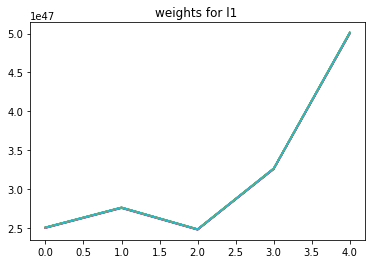

In [ ]:
for alpha in range(-10,10):
    weights,cost= model_ch.fit_l1(x_train,y_train, alpha)
    weights2,cost2= model_ch.fit_l2(x_train,y_train, alpha)
#     plt.figure(figsize=(9,7))
    plt.plot(weights)
    plt.title('weights for l1 ')

    print(np.linalg.norm(weights))

3.879877483398101e+28
1.473803290511201e+26
4.9864341994009324e+23
1.392127699216874e+21
3.264431459361379e+18
6169537807893774.0
9880811840256.326
13032691438.212763
15605688.397738809
23196.605286223523
303.53314614218294
485.0590494192201
103907.88194498097
73583911.5255364
56453176833.17028
37201085747674.45
2.056950404100025e+16
8.94358946080701e+18
3.481957373972489e+21
1.0765803614153763e+24


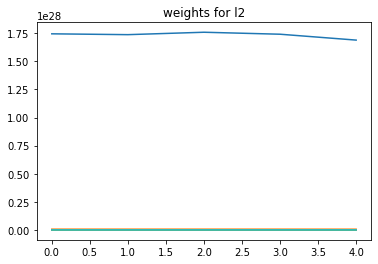

In [ ]:
for alpha in range(-10,10):
    weights2,cost2= model_ch.fit_l2(x_train,y_train, alpha)
#     plt.figure(figsize=(9,7))
    plt.plot(weights2)
    plt.title('weights for l2')    
    print(np.linalg.norm(weights2))

Weights of L2 regularization model are very sparsed compared to the weights of l1 model.

Step4. Exploring the model weights and hyperparameters

Using Mini-batch GD, a 20% test size and a lr of 0.01, fit the training samples, and
predict on the training samples and test samples. Store the MSE error for each
epoch during training in an array. You can write a function to perform this.
Plot the train and test error as a function of the number of epochs.

In [ ]:

class Linear_MBGD_test:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    
    def fit(self, x, y,x_test, y_test, batch_size=64):
        n=len(x)
        cost =[]
        cost_test =[]
        self.theta = np.random.rand(x.shape[1],1)
        y = y.reshape(-1,1)
        num = x.shape[0]//batch_size
        
        for i in range(self.iteration):
#             if i%100 == 0: print(i)
            for index in range(num):

                xi = x[index*batch_size:index*batch_size+batch_size]
                yi = y[index*batch_size:index*batch_size+batch_size]
        
                prev = self.theta
                loss = self.mse(yi, xi @ prev)
                self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi))
                cost.append(loss)
                y_test1 = self.predict(x_test)
                loss1 = self.mse(y_test, y_test1)
                cost_test.append(loss1)
                if np.sum(self.theta-prev)**2 <= self.eps:
                    break

        return self.theta, cost, cost_test
    
    def predict(self,x):
        y_pred_tr = x @ self.theta
        return y_pred_tr
    
    def mse(self, y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
model_test = Linear_MBGD_test(3,0.01,0.00001)

In [ ]:
theta, cost, cost_test= model_test.fit(x_train, y_train,x_valid, y_valid)


In [ ]:
x_train.shape, y_train.shape,x_valid.shape, y_valid.shape

((7655, 5), (7655, 1), (1913, 5), (1913, 1))

Text(0.5, 1.0, 'Test MSE')

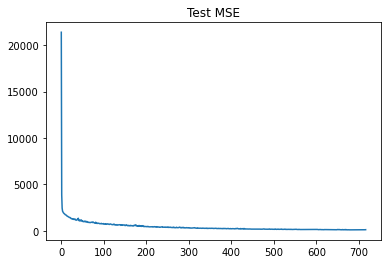

In [ ]:

plt.plot(cost_test)
plt.title('Test MSE')

Text(0.5, 1.0, 'Training MSE')

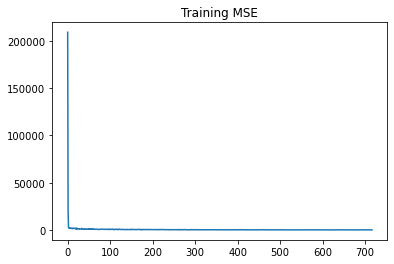

In [ ]:
plt.plot(cost)
plt.title('Training MSE')

In [ ]:
y_pred_tr= model_test.predict(x_train)
y_pred = model_test.predict(x_valid)
y_pred_tr.shape, y_pred.shape

((7655, 1), (1913, 1))

In [ ]:
mse_tr = model_test.mse(y_pred_tr,y_train)
mse = model_test.mse(y_pred,y_valid)
mse_tr, mse

(85.64492867927099, 113.72317144278738)

Using different split sizes between 0.1 and 0.9

Using Mini-batch GD and different split sizes in [0.1, 0.9], fit the training samples, and
predict on the training samples and test samples. Store the MSE error for each split
in an array. Use any LR of your choice. You can write a function to perform this.
Plot the train and test error as a function of the split sizes. How does the split size
affect the errors?

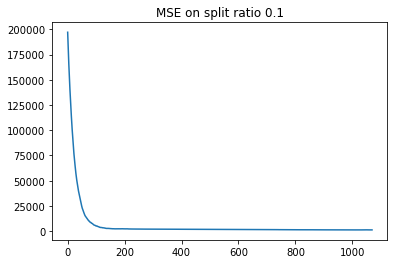

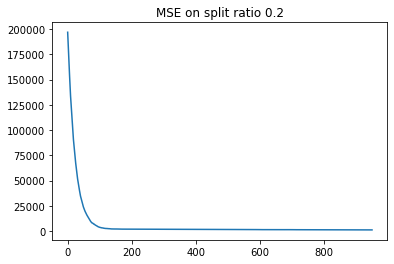

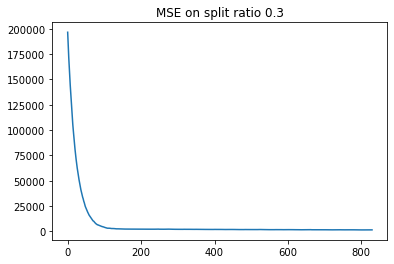

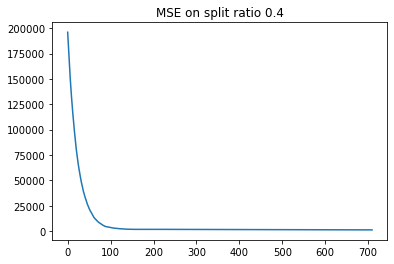

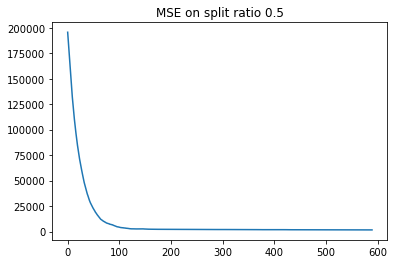

In [ ]:
def use_diff_split(data):    
    for valid_ratio in range(1, 6):
        Xx_train, Yy_train,Xx_valid, Yy_valid=split_train_valid(data,valid_ratio/10)
        theta, cost1, cost_test1= model_test.fit(Xx_train, Yy_train,Xx_valid, Yy_valid)
        plt.figure()
        plt.plot(cost_test1)
#         plt.plot(cost1,'r')
        plt.title('MSE on split ratio {}'.format(valid_ratio/10))

use_diff_split(data)

The mean square error increases as the split size is increased.

In this section, we will add more features to the data to see the effect of overfitting on the data.

In [ ]:
def split(data, ratio):
    data = data.sample(frac=1).reset_index(drop=True)
    c = int(ratio * len(data))
    dt_train, dt_test = data[:c], data[c:]
    
    return dt_train, dt_test


def norm_data(data, ratio):
    train, test = split(data, ratio)
    X_train = train.drop(['PE'],axis=1)
    X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
    
    Y_train =train[['PE']]
    X_test = test.drop(['PE'],axis=1)
    X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())    
    Y_test =test[['PE']]
    
    X_train = np.c_[X_train.values,np.ones((len(X_train),1))]
    X_test = np.c_[X_test.values,np.ones((len(X_test),1))]
    Y_train = Y_train.values
    Y_test = Y_test.values    
    return X_train,Y_train,X_test,Y_test


In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((7654, 5), (7654, 1), (957, 4), (957, 1))

In [ ]:
###Polynomial of degree two###############
X_poly2 = data.copy()
X_poly2['AT2']= X_poly2['AT']**2
X_poly2['V2']= X_poly2['V']**2
X_poly2['AP2']= X_poly2['AP']**2
X_poly2['RH2']= X_poly2['RH']**2
X_poly2.head()

,AT,V,AP,RH,PE,AT2,V2,AP2,RH2
0,14.96,41.76,1024.07,73.17,463.26,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,117.0724,1406.2500,1.018545e+06,9335.4244


In [ ]:
x_poly2['AT']= x_poly2['AT']**2

In [ ]:
###Polynomial of degree 3##########
X_poly23 = X_poly2.copy()
X_poly23['AT3']= X_poly2['AT']**3
X_poly23['V3']= X_poly2['V']**3
X_poly23['AP3']= X_poly2['AP']**3
X_poly23['RH3']= X_poly2['RH']**3
X_poly23.head()

,AT,V,AP,RH,PE,AT2,V2,AP2,RH2,AT3,V3,AP3,RH3
0,14.96,41.76,1024.07,73.17,463.26,223.8016,1743.8976,1.048719e+06,5353.8489,3348.071936,72825.163776,1.073962e+09,391741.124013
1,25.18,62.96,1020.04,59.08,444.37,634.0324,3963.9616,1.040482e+06,3490.4464,15964.935832,249571.022336,1.061333e+09,206215.573312
2,5.11,39.40,1012.16,92.14,488.56,26.1121,1552.3600,1.024468e+06,8489.7796,133.432831,61162.984000,1.036925e+09,782248.292344
3,20.86,57.32,1010.24,76.64,446.48,435.1396,3285.5824,1.020585e+06,5873.6896,9077.012056,188329.583168,1.031036e+09,450159.570944
4,10.82,37.50,1009.23,96.62,473.90,117.0724,1406.2500,1.018545e+06,9335.4244,1266.723368,52734.375000,1.027946e+09,901988.705528


In [ ]:
###Polynomial of order 4##########
X_poly234=X_poly23.copy()
X_poly234['AT4']= X_poly2['AT']**4
X_poly234['V4']= X_poly2['V']**4
X_poly234['AP4']= X_poly2['AP']**4
X_poly234['RH4']= X_poly2['RH']**4
X_poly234.head()

,AT,V,AP,RH,PE,AT2,V2,AP2,RH2,AT3,V3,AP3,RH3,AT4,V4,AP4,RH4
0,14.96,41.76,1024.07,73.17,463.26,223.8016,1743.8976,1.048719e+06,5353.8489,3348.071936,72825.163776,1.073962e+09,391741.124013,50087.156163,3.041179e+06,1.099812e+12,2.866370e+07
1,25.18,62.96,1020.04,59.08,444.37,634.0324,3963.9616,1.040482e+06,3490.4464,15964.935832,249571.022336,1.061333e+09,206215.573312,401997.084250,1.571299e+07,1.082602e+12,1.218322e+07
2,5.11,39.40,1012.16,92.14,488.56,26.1121,1552.3600,1.024468e+06,8489.7796,133.432831,61162.984000,1.036925e+09,782248.292344,681.841766,2.409822e+06,1.049534e+12,7.207636e+07
3,20.86,57.32,1010.24,76.64,446.48,435.1396,3285.5824,1.020585e+06,5873.6896,9077.012056,188329.583168,1.031036e+09,450159.570944,189346.471488,1.079505e+07,1.041593e+12,3.450023e+07
4,10.82,37.50,1009.23,96.62,473.90,117.0724,1406.2500,1.018545e+06,9335.4244,1266.723368,52734.375000,1.027946e+09,901988.705528,13705.946842,1.977539e+06,1.037434e+12,8.715015e+07


Using a test size of 20%, calculate the MSE for train and test data using the
different data X(initial data), X_poly2, X_poly2_3, X_poly2_3_4. Plot the train and
test MSE against the degree of polynomial of the features. Use a fixed lambda value
of zero. How does the degree affect fitting of the data?

Text(0.5, 1.0, 'MSE for initial data')

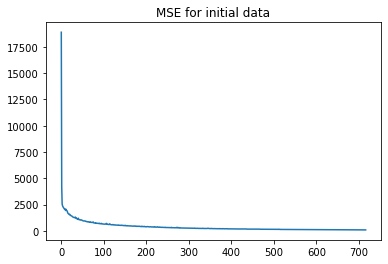

In [ ]:
######MSE for initial data########
X_train, Y_train,X_valid, Y_valid=norm_data(data, ratio=0.8)
theta, cost_in, cost_test_in= model_test.fit(X_train, Y_train,X_valid, Y_valid)
plt.plot(cost_test_in)
plt.title('MSE for initial data')

Text(0.5, 1.0, 'MSE for data of degre 2 polynomial')

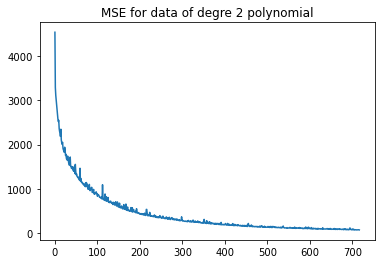

In [ ]:
######MSE for data of degre 2 polynomial########
X_train2, Y_train2,X_valid2, Y_valid2=norm_data(X_poly2,0.8)
theta, cost2, cost_test2= model_test.fit(X_train2, Y_train2,X_valid2, Y_valid2)
plt.plot(cost_test2)
plt.title('MSE for data of degre 2 polynomial')

Text(0.5, 1.0, 'MSE for data of degre 3 polynomial')

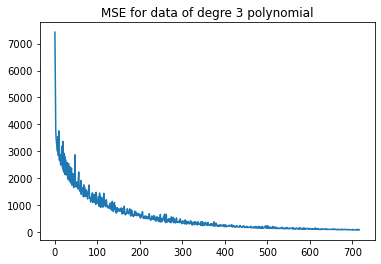

In [ ]:
######MSE for data of degre 3 polynomial########
X_train23, Y_train23,X_valid23, Y_valid23=norm_data(X_poly23,0.8)
theta, cost23, cost_test23= model_test.fit(X_train23, Y_train23,X_valid23, Y_valid23)
plt.plot(cost_test23)
plt.title('MSE for data of degre 3 polynomial')

Text(0.5, 1.0, 'MSE for data of degre 4 polynomial')

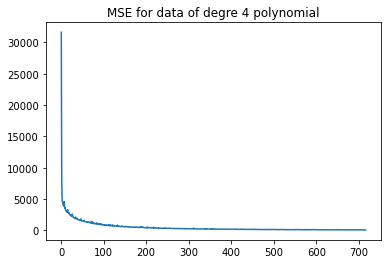

In [ ]:
######MSE for data of degre 4 polynomial########
X_train234, Y_train234,X_valid234, Y_valid234=norm_data(X_poly234,ratio=0.8)
theta, cost234, cost_test234= model_test.fit(X_train234, Y_train234,X_valid234, Y_valid234)
plt.plot(cost_test234)
plt.title('MSE for data of degre 4 polynomial')   

As the degree of polynomial increases, the mean square error increase.

Select the X_poly2_3_4 dataset and regularize the model. What value of lambda
gives the best model and the corresponding MSE on the validation data?

In [ ]:
theta4,cost4= model_ch.fit_l1(X_train234,Y_train234, alpha=0.01)
ypred = model_ch.predict(X_valid234)
mse = model_ch.rmse(ypred,Y_valid234)
mse

9.640302662241265e+225

In [ ]:
X_train234.shape, Y_train234.shape,X_valid234.shape, Y_valid234.shape

((7654, 17), (7654, 1), (1914, 17), (1914, 1))

In [ ]:
theta_new,cost_new= model_ch.fit_l2(X_train234,Y_train234, alpha=0.01)
ypred_new = model_ch.predict(X_valid234)
mse_new = model_ch.rmse(ypred,Y_valid234)
mse_new

9.640302662241265e+225

Using Mini-batch SGD and learning rates in the range of [1e-9, 2], train your models
for only 3 epoch and compute the training and test losses. Plot the losses as a
function of your learning rate. How does the learning rate affect the convergence rate
and loss of the model? In which learning rate regions, is the model underfitting?

<ipython-input-774-bf90044f331d>:42: RuntimeWarning: overflow encountered in square
  x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
<ipython-input-774-bf90044f331d>:30: RuntimeWarning: overflow encountered in double_scalars
  if np.sum(self.theta-prev)**2 <= self.eps:
<ipython-input-774-bf90044f331d>:25: RuntimeWarning: overflow encountered in matmul
  self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi))
<ipython-input-774-bf90044f331d>:36: RuntimeWarning: invalid value encountered in matmul
  y_pred_tr = x @ self.theta
<ipython-input-774-bf90044f331d>:25: RuntimeWarning: invalid value encountered in subtract
  self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi))
<ipython-input-774-bf90044f331d>:24: RuntimeWarning: invalid value encountered in matmul
  loss = self.mse(yi, xi @ prev)
<ipython-input-774-bf90044f331d>:25: RuntimeWarning: invalid value encountered in matmul
  self.theta = self.theta - self.LR*(xi.T@(xi@self.theta - yi))
<ipython-input-774-bf90044f331d>:36: Ru

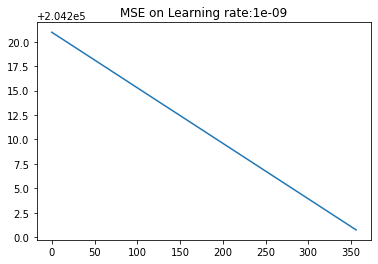

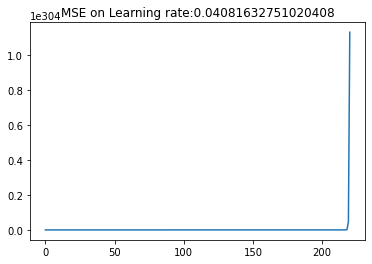

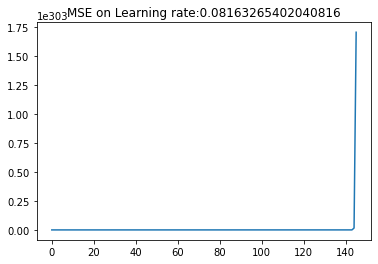

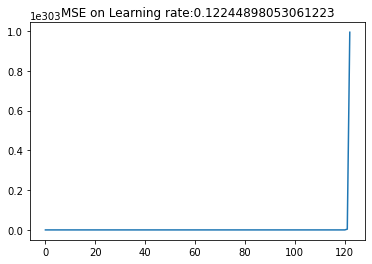

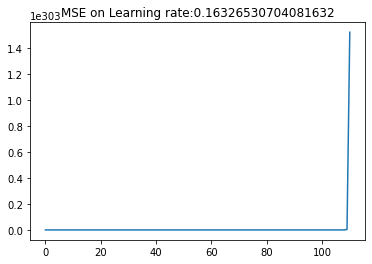

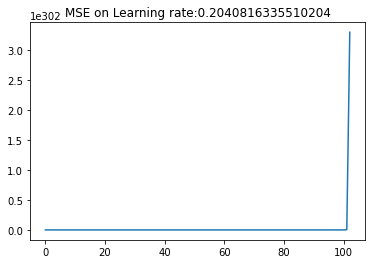

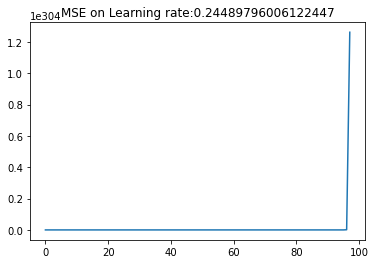

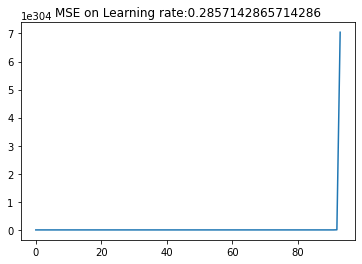

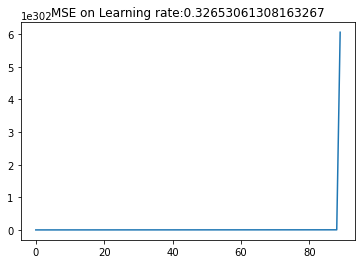

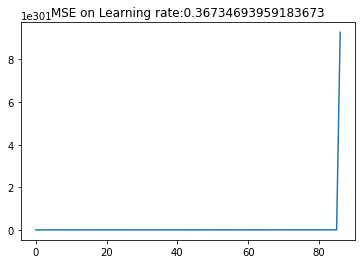

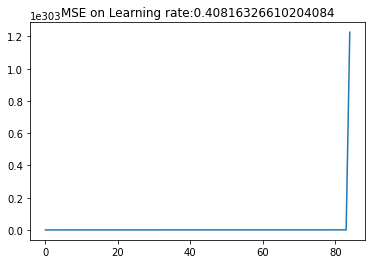

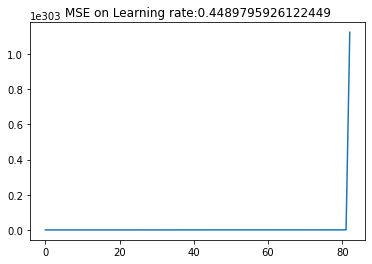

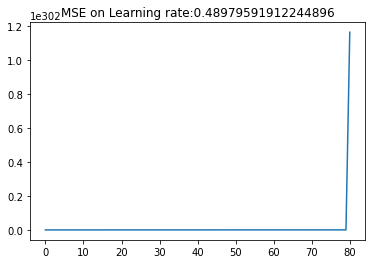

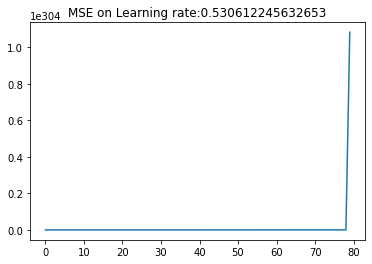

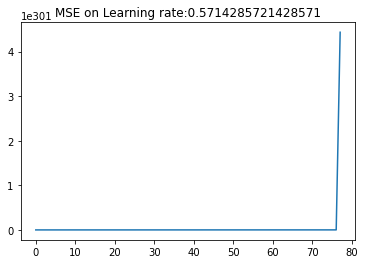

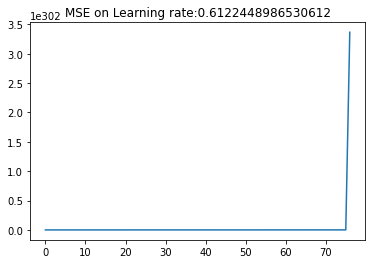

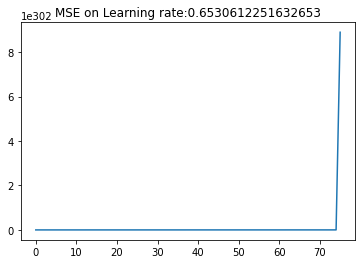

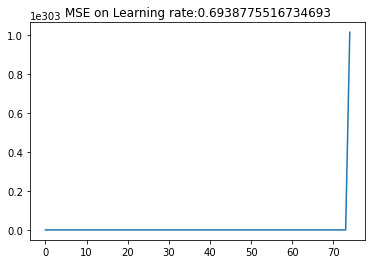

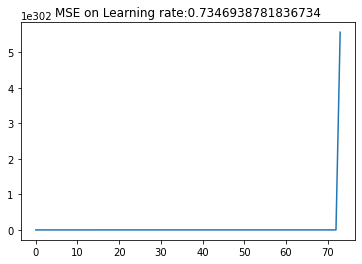

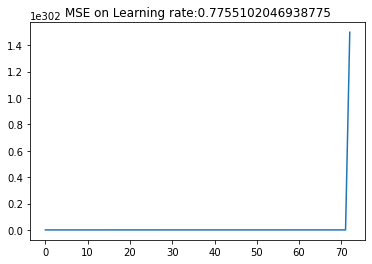

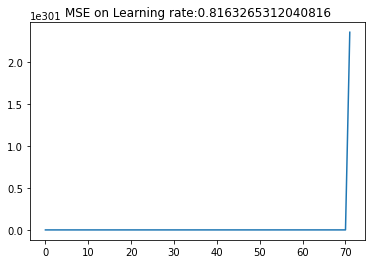

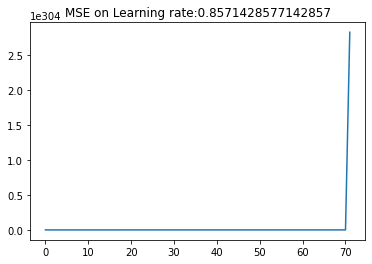

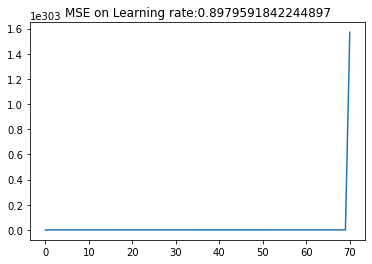

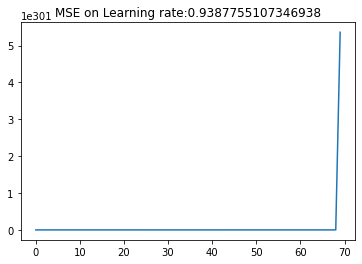

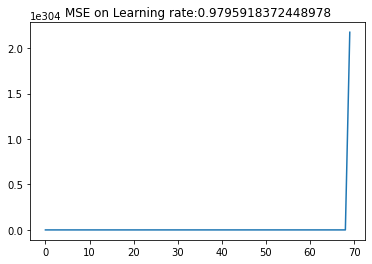

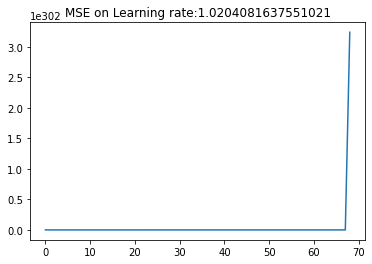

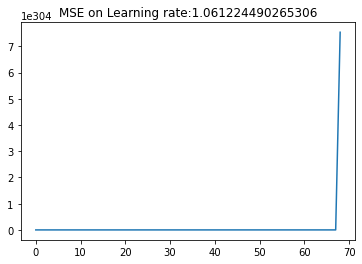

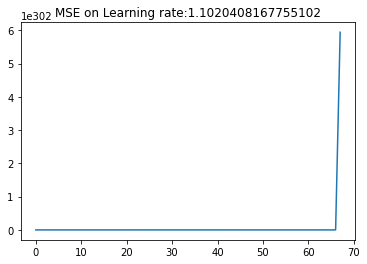

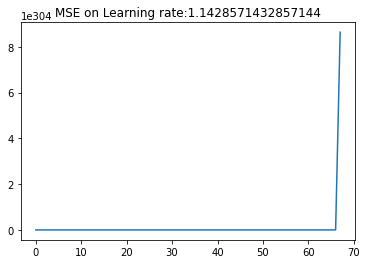

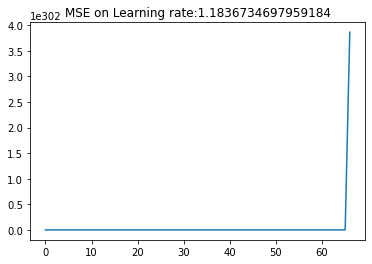

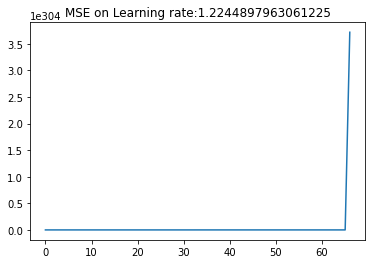

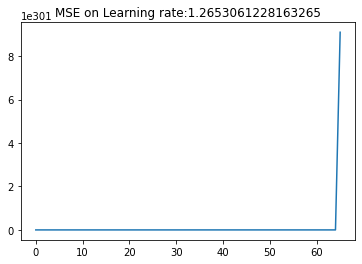

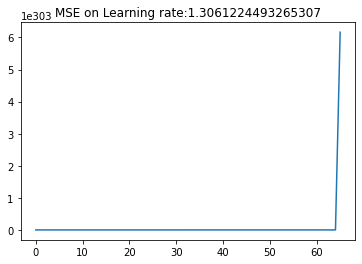

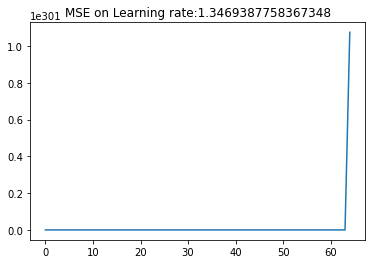

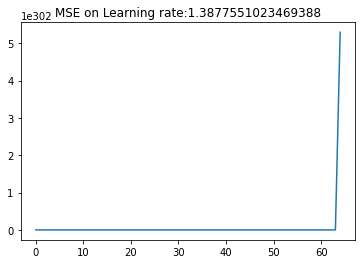

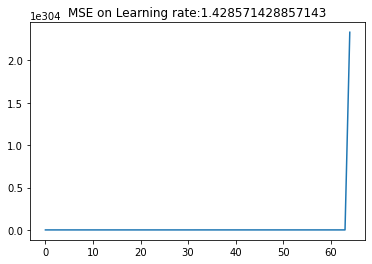

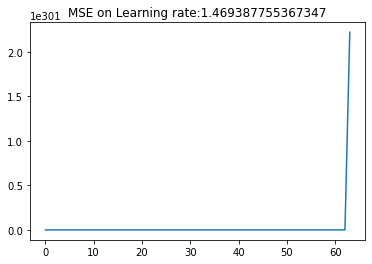

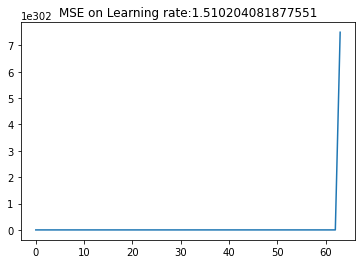

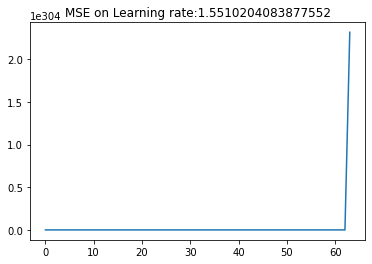

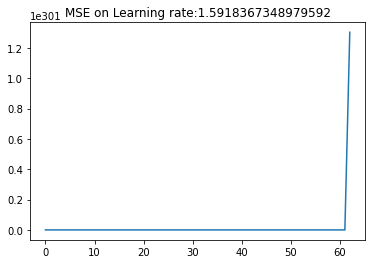

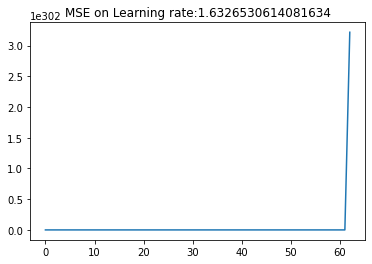

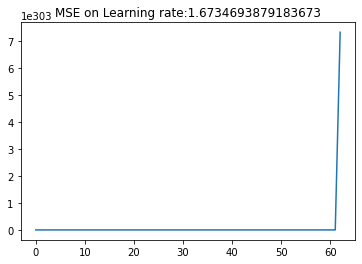

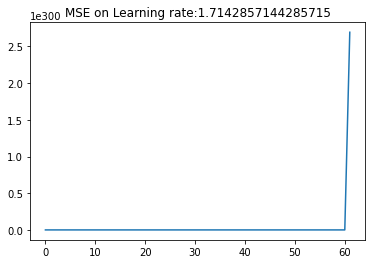

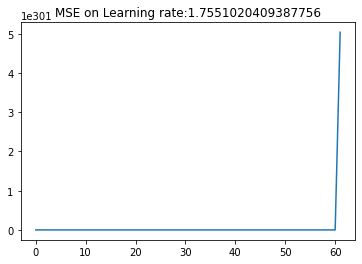

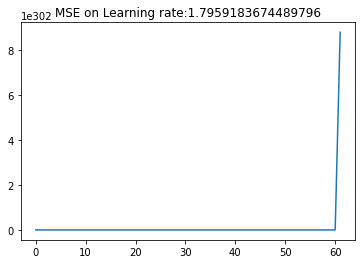

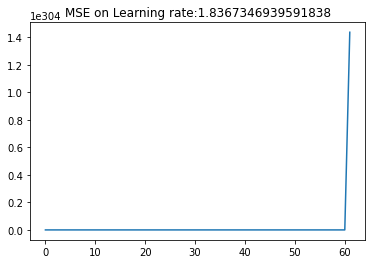

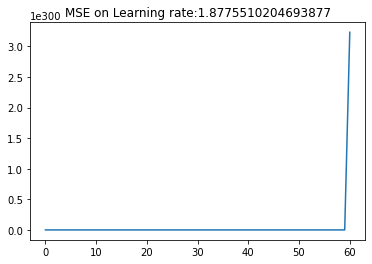

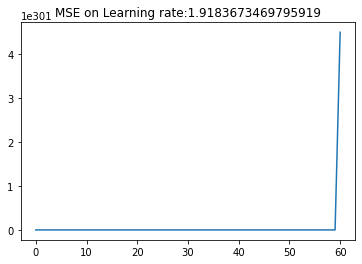

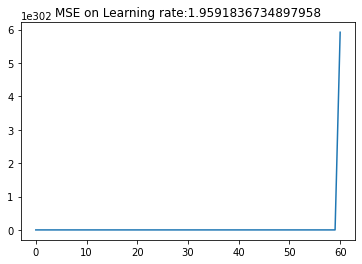

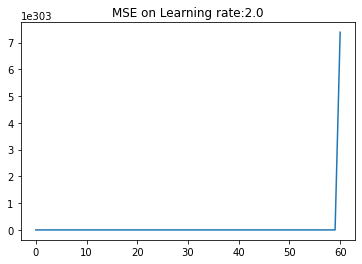

In [ ]:
def change_LR():
    for LR in np.linspace(1e-9,2):
        model_test1 = Linear_MBGD_test(3, LR, eps =0.00001)
        theta, mse, mse_ts = model_test1.fit(x_train, y_train,x_valid, y_valid)
        plt.figure()
        plt.plot(mse_ts)
        plt.title('MSE on Learning rate:{}'.format(LR))

change_LR()

Step 5 Performing cross validation

The L1 and L2 penalties as we have observed from the previous task have proven to
be some sort of “magic” hyper-parameters which we need to find in order to get a
good performing model. We could alternatively, use the validation set approach, but
this approach also has a major disadvantage: it leaves fewer samples available for
training. Therefore, cross-validation is a better option to overcome this challenge by
using all the training set in a smart way.

Implement your own cross-validation and find the best model based on the different
values of lambda. Refer to your notes for the pseudocode.

In [ ]:

class Kfolds:
    def __init__(self, iteration, LR, eps):
        self.iteration = iteration
        self.LR = LR
        self.theta =None
        self.eps = eps
    def fit_l1(self, x, y,alpha):
        cost =[]
        self.theta = np.random.randn(x.shape[1],1)
        y = y.reshape(x.shape[0],1)
        for i in range(self.iteration):

            prev = self.theta
            loss = self.mse(y, x@prev) 
            self.theta = self.theta - self.LR*(2/len(x))*(x.T@((x@self.theta) -y)+alpha*self.theta/np.abs(self.theta))
            cost.append(loss)
            if np.linalg.norm(self.theta-prev)**2 <= self.eps:
                break
        return self.theta, cost
    
    def cross_val(self,data, k=10):
      av =[]
      N = len(data)
      data_arr = data.to_numpy()

      data_arr[:,:-1] = data_arr[:,:-1] / data_arr[:,:-1].max()

      num= N//k
      best_avg_mse = 1e100000
      best_lambda=-1
      for alpha in np.linspace(0.01,0.09,10):
        av = []
        for i in range(0,k):
          valid = data_arr[i*num:(i+1)*num]
          train = np.vstack((data_arr[0:(i)*num] , data_arr[(i+1)*num:]))

          xx_train = train[:,:-1]
          yy_train = train[:,-1] 
          xx_valid = valid[:,:-1]
          yy_valid = valid[:,-1]   


          mod_tr = self.fit_l1(xx_train, yy_train,alpha)
          y = self.predict(xx_valid)
          mse = self.mse(y, yy_valid)
          av.append(mse)
        perf = np.mean(av)
        if perf < best_avg_mse:
          best_avg_mse = perf
          best_lambda= alpha
      
        print('Model at lambda={}, the performance is {}'.format(alpha, perf))
      print('\n So the best model is at lambda={} its performance is {}'.format(best_lambda, np.min(best_avg_mse)))
      return perf

    def predict(self,x):
        y_pred = x @ self.theta 
        return y_pred
    def mse(self,y, y1):
        n = len(y)
        
        x=(y.reshape(-1,1) - y1.reshape(-1,1))**2
        
        return np.sum(x) / n

In [ ]:
mod = Kfolds(100000,0.01,0.0001)

In [ ]:
cross = mod.cross_val(data)

Model at lambda=0.01, the performance is 255.88687403888804
Model at lambda=0.01888888888888889, the performance is 255.58326910951808
Model at lambda=0.027777777777777776, the performance is 255.4931695390033
Model at lambda=0.03666666666666667, the performance is 255.45298163631983
Model at lambda=0.04555555555555556, the performance is 255.80460890947467
Model at lambda=0.05444444444444445, the performance is 255.7407673718264
Model at lambda=0.06333333333333332, the performance is 255.4402427016029
Model at lambda=0.07222222222222222, the performance is 255.74832303921153
Model at lambda=0.0811111111111111, the performance is 255.47933872264804
Model at lambda=0.09, the performance is 255.52555451616598

 So the best model is at lambda=0.06333333333333332 its performance is 255.4402427016029
